Arboles de decisión

In [7]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("C:/Users/JUAN PABLO/OneDrive/Documentos/7-SEMESTRE/Red Wine Quality/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.shape

(1599, 12)

In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

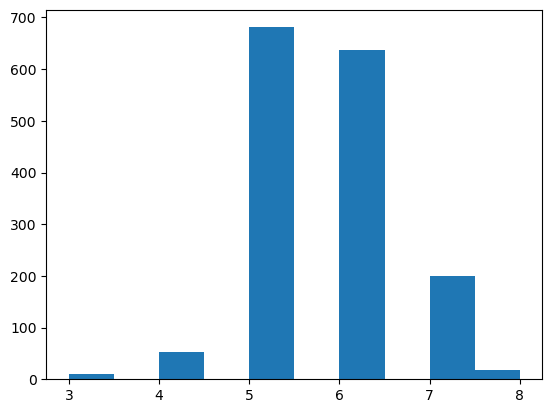

In [17]:
plt.hist(data.quality)

podemos observar en el histograma que el dataset no está balanceado

<Axes: xlabel='volatile acidity', ylabel='residual sugar'>

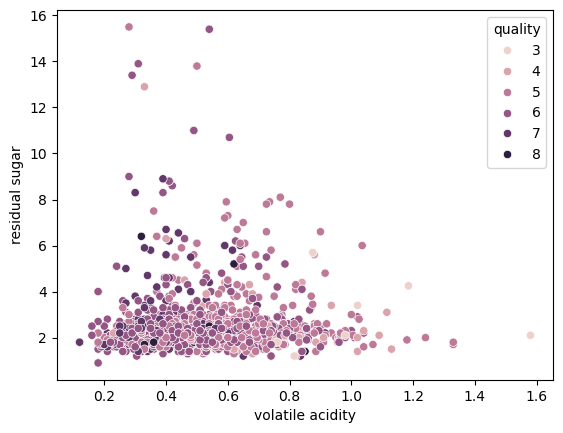

In [20]:
sns.scatterplot(x="volatile acidity", y="residual sugar", hue="quality", data=data)

Que relacion hay entre la acidez y el dulce que tienen mejor calidad para el vino, como podemos observar entre mas acido con notas dulces el vino encuentra una mejor rankin en calidad

<Axes: xlabel='density', ylabel='pH'>

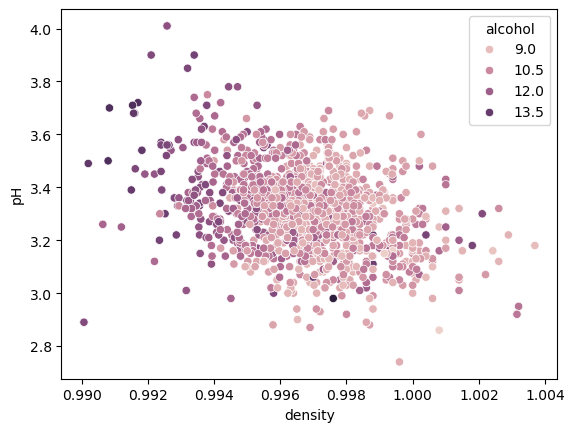

In [23]:
sns.scatterplot(x="density", y="pH", hue="alcohol", data=data)

Como podemos ver en la grafica los vinos con mayor pH y una densidad mas baja se tornan con mayor concentracion de alcohol

<Axes: xlabel='total sulfur dioxide', ylabel='density'>

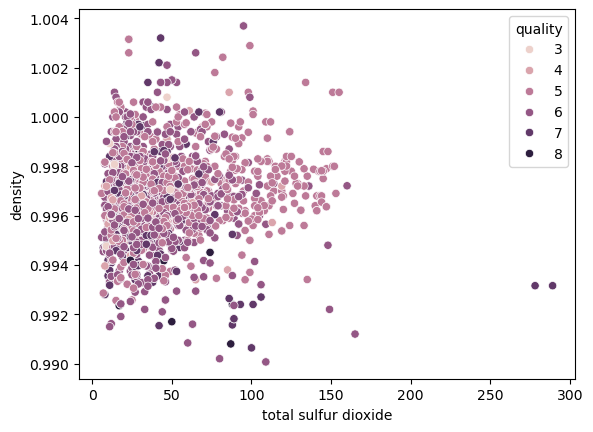

In [26]:
sns.scatterplot(x="total sulfur dioxide", y="density", hue="quality", data=data)

En la grafica podemos observar que a mayor cantidad de dióxido de azufre total en un vino reduce mucho su calidad como vemos en el valor 100 en adelante.

<Axes: xlabel='alcohol', ylabel='residual sugar'>

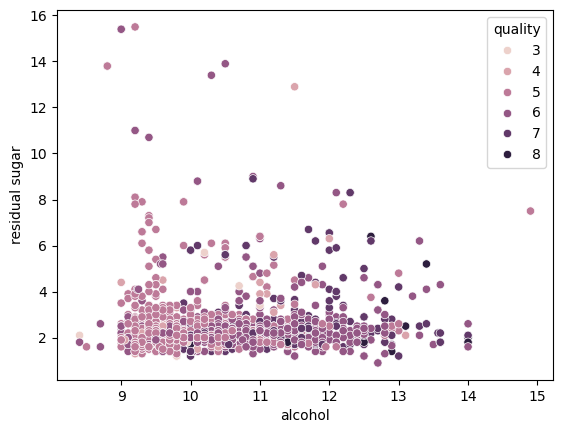

In [29]:
sns.scatterplot(x="alcohol", y="residual sugar", hue="quality", data=data)

Concluimos que a menor cantidad de azucar y mayor cantidad de alcohol la calidad del vino aumenta considerablemente

<Axes: xlabel='pH', ylabel='fixed acidity'>

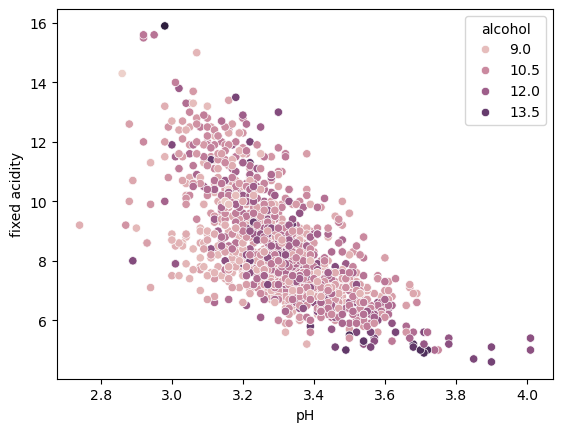

In [32]:
sns.scatterplot(x="pH", y="fixed acidity", hue="alcohol", data=data)

Con este ultimo histograma podemos concluir que a mayor pH y menor acidez fija mas alcohol contiene.

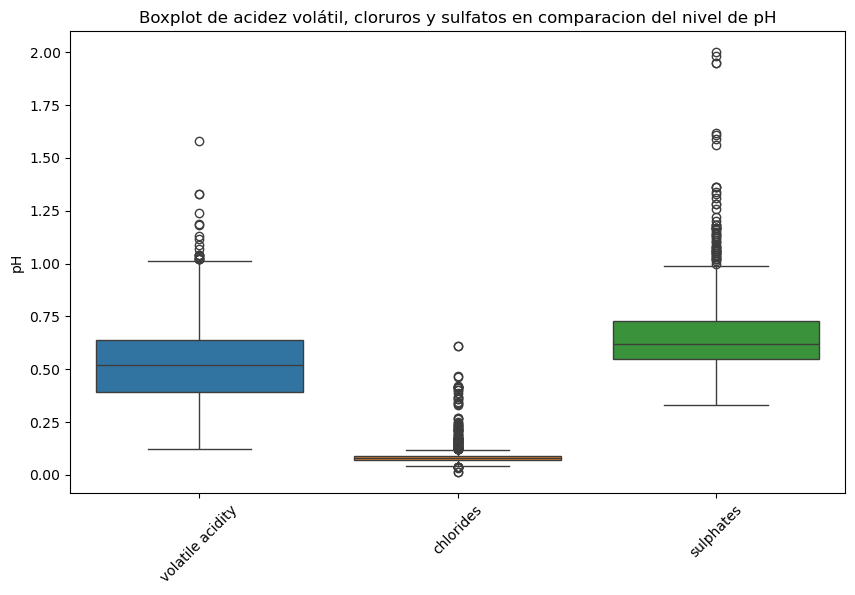

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['volatile acidity', 'chlorides', 'sulphates']])
plt.xticks(rotation=45)
plt.title('Boxplot de acidez volátil, cloruros y sulfatos en comparacion del nivel de pH')
plt.ylabel('pH')
plt.show()

Se observa en la grafica de algunos percentiles se desfasaron por el nivel de pH que tienen los vinos sin embargo cabe resaltar que en la investigacion previa que se realizo no se observa que superen valores por fuera de lo normal con diferencia del sulfato sin embargo en una tabla de escala normal esta entre los rangos.

In [38]:
predictors_col = ["density", "volatile acidity", "citric acid", "chlorides", "sulphates"]
target_col = ['quality']

In [40]:
predictors = data[predictors_col]
target = data[target_col]

In [42]:
predictors

,density,volatile acidity,citric acid,chlorides,sulphates
0,0.99780,0.700,0.00,0.076,0.56
1,0.99680,0.880,0.00,0.098,0.68
2,0.99700,0.760,0.04,0.092,0.65
3,0.99800,0.280,0.56,0.075,0.58
4,0.99780,0.700,0.00,0.076,0.56
...,...,...,...,...,...
1594,0.99490,0.600,0.08,0.090,0.58
1595,0.99512,0.550,0.10,0.062,0.76
1596,0.99574,0.510,0.13,0.076,0.75
1597,0.99547,0.645,0.12,0.075,0.71


In [44]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [46]:
corr = predictors.corr()
corr

,density,volatile acidity,citric acid,chlorides,sulphates
density,1.000000,0.022026,0.364947,0.200632,0.148506
volatile acidity,0.022026,1.000000,-0.552496,0.061298,-0.260987
citric acid,0.364947,-0.552496,1.000000,0.203823,0.312770
chlorides,0.200632,0.061298,0.203823,1.000000,0.371260
sulphates,0.148506,-0.260987,0.312770,0.371260,1.000000


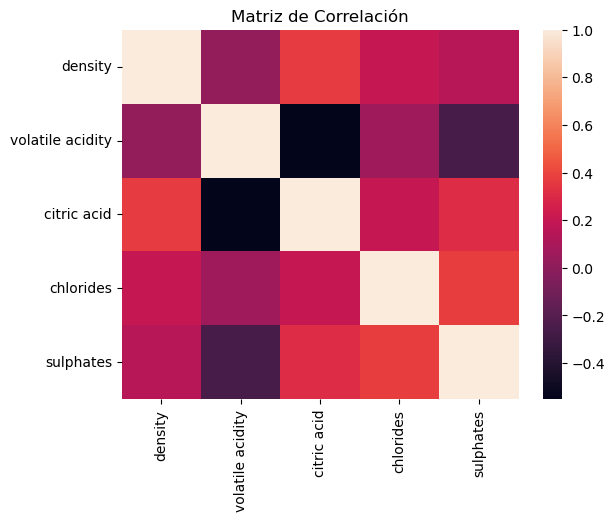

In [48]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [52]:
tree = DecisionTreeClassifier()

In [54]:
arbol = tree.fit(X_train, y_train)

[Text(0.3464781097454672, 0.9761904761904762, 'x[4] <= 0.585\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.1155912221059972, 0.9285714285714286, 'x[0] <= 0.995\ngini = 0.563\nsamples = 483\nvalue = [6.0, 31.0, 282.0, 145.0, 19.0, 0.0]'),
 Text(0.2310346659257322, 0.9523809523809523, 'True  '),
 Text(0.06293584379358438, 0.8809523809523809, 'x[2] <= 0.255\ngini = 0.658\nsamples = 112\nvalue = [2, 9, 35, 53, 13, 0]'),
 Text(0.033821478382147836, 0.8333333333333334, 'x[4] <= 0.525\ngini = 0.648\nsamples = 84\nvalue = [2, 9, 34, 35, 4, 0]'),
 Text(0.011157601115760111, 0.7857142857142857, 'x[0] <= 0.993\ngini = 0.585\nsamples = 39\nvalue = [2, 4, 23, 9, 1, 0]'),
 Text(0.008368200836820083, 0.7380952380952381, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.01394700139470014, 0.7380952380952381, 'x[1] <= 0.898\ngini = 0.531\nsamples = 35\nvalue = [2, 4, 23, 5, 1, 0]'),
 Text(0.008368200836820083, 0.6904761904761905, 'x[3] <= 0.178\n

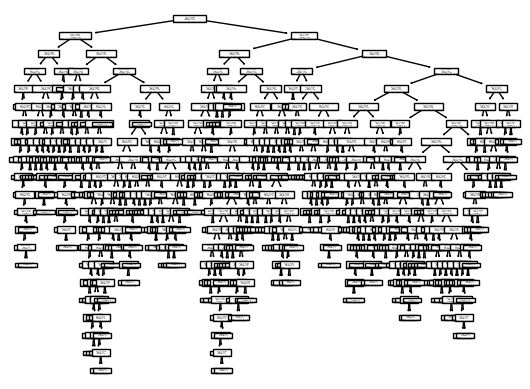

In [56]:
plot_tree(arbol)

In [58]:
predicciones = arbol.predict(X_test)

In [60]:
predicciones

array([5, 5, 5, 5, 6, 5, 5, 6, 5, 4, 5, 6, 5, 6, 7, 5, 6, 7, 5, 6, 5, 6,
       8, 5, 6, 5, 5, 4, 5, 6, 7, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6,
       5, 5, 6, 6, 6, 6, 5, 6, 7, 5, 7, 5, 7, 6, 7, 5, 5, 5, 5, 6, 6, 7,
       6, 3, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 8, 6, 6, 5, 5, 7, 7, 5,
       7, 6, 5, 6, 4, 7, 7, 6, 5, 5, 6, 5, 6, 6, 5, 5, 7, 7, 6, 6, 5, 6,
       5, 7, 8, 6, 5, 6, 7, 7, 5, 6, 5, 6, 5, 6, 4, 6, 5, 5, 6, 7, 6, 4,
       5, 7, 7, 5, 7, 5, 6, 6, 7, 5, 5, 6, 7, 5, 7, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 7, 6, 5, 7, 6, 5, 5, 5, 6, 8, 5,
       5, 6, 5, 5, 5, 6, 6, 7, 5, 7, 6, 6, 6, 5, 5, 6, 5, 5, 7, 5, 6, 6,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 5, 6, 4, 6, 6,
       5, 5, 6, 5, 6, 6, 5, 5, 5, 7, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6,
       5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 7, 6, 3, 7, 5, 7, 6, 6, 6, 5,
       7, 6, 6, 7, 7, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5,
       6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5,

In [62]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,0,5,3,0,0
5,2,3,102,30,9,0
6,0,3,30,75,15,1
7,0,0,1,14,18,2
8,0,0,1,1,3,1


In [64]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6125

In [66]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6171287020905923

In [68]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.6125

In [70]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6137296995767391

In [72]:
predictors_col = ["fixed acidity", "residual sugar", "pH"] 
target_col = ['quality']

In [74]:
predictors = data[predictors_col] 
target = data[target_col]

In [76]:
predictors

,fixed acidity,residual sugar,pH
0,7.4,1.9,3.51
1,7.8,2.6,3.20
2,7.8,2.3,3.26
3,11.2,1.9,3.16
4,7.4,1.9,3.51
...,...,...,...
1594,6.2,2.0,3.45
1595,5.9,2.2,3.52
1596,6.3,2.3,3.42
1597,5.9,2.0,3.57


In [78]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [80]:
corr = predictors.corr() 
corr

,fixed acidity,residual sugar,pH
fixed acidity,1.000000,0.114777,-0.682978
residual sugar,0.114777,1.000000,-0.085652
pH,-0.682978,-0.085652,1.000000


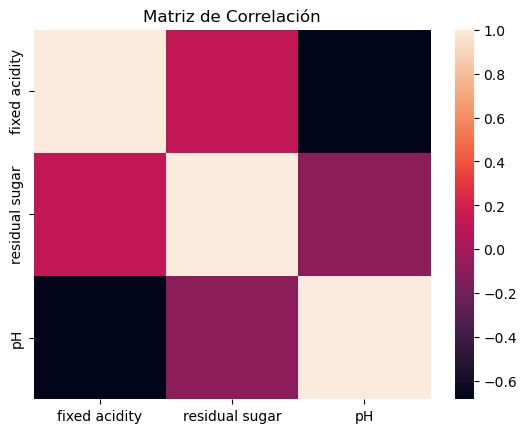

In [82]:
sns.heatmap(corr) 
plt.title('Matriz de Correlación') 
plt.show()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [86]:
tree = DecisionTreeClassifier()

In [88]:
arbol = tree.fit(X_train, y_train)

[Text(0.6587049507212543, 0.9791666666666666, 'x[0] <= 10.05\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.33264828195967316, 0.9375, 'x[2] <= 3.285\ngini = 0.631\nsamples = 1070\nvalue = [7, 39, 487, 412, 117, 8]'),
 Text(0.4956766163404638, 0.9583333333333333, 'True  '),
 Text(0.12250090559518502, 0.8958333333333334, 'x[0] <= 7.85\ngini = 0.592\nsamples = 364\nvalue = [0.0, 7.0, 198.0, 115.0, 40.0, 4.0]'),
 Text(0.010839277753009363, 0.8541666666666666, 'x[0] <= 6.55\ngini = 0.467\nsamples = 97\nvalue = [0, 1, 67, 22, 6, 1]'),
 Text(0.009055951850200625, 0.8125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.0126226036558181, 0.8125, 'x[2] <= 3.145\ngini = 0.454\nsamples = 95\nvalue = [0, 1, 67, 20, 6, 1]'),
 Text(0.0035666518056174765, 0.7708333333333334, 'x[0] <= 6.7\ngini = 0.124\nsamples = 15\nvalue = [0, 0, 14, 1, 0, 0]'),
 Text(0.0017833259028087382, 0.7291666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0,

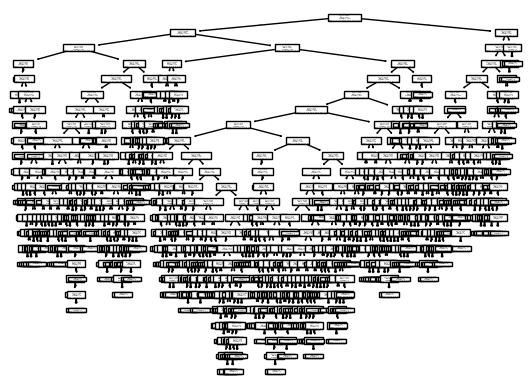

In [90]:
plot_tree(arbol)

In [92]:
predicciones = arbol.predict(X_test)

In [94]:
predicciones

array([4, 6, 5, 5, 6, 5, 6, 6, 5, 6, 7, 6, 5, 7, 7, 5, 6, 5, 6, 7, 5, 6,
       6, 5, 5, 6, 5, 4, 6, 6, 6, 8, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6,
       5, 4, 6, 5, 6, 6, 7, 3, 6, 5, 7, 5, 5, 5, 4, 5, 5, 5, 5, 5, 7, 7,
       6, 6, 5, 6, 6, 7, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 5, 5, 8, 6, 6,
       6, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5, 4, 5, 6, 7, 5, 5, 5, 7,
       4, 5, 5, 5, 6, 7, 6, 7, 5, 5, 5, 7, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5,
       5, 7, 7, 5, 7, 5, 6, 7, 5, 5, 5, 7, 6, 3, 7, 5, 6, 6, 5, 7, 5, 6,
       5, 5, 5, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5, 7, 7, 5, 5, 5, 6, 5, 6,
       5, 6, 6, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 4, 5, 5, 5, 6, 7,
       5, 5, 6, 6, 5, 6, 6, 7, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 7, 7, 6, 3, 5, 5, 5, 6, 5, 5, 5,
       5, 7, 6, 7, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 5, 5, 5,
       5, 7, 3, 5, 6, 6, 6, 6, 5, 6, 5, 5, 7, 7, 5,

In [96]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,1,0,3,2,2,0
5,3,4,89,39,10,1
6,1,4,35,71,12,1
7,0,1,14,6,14,0
8,0,0,2,3,1,0


In [106]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.54375

In [108]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.5487349058045778

In [110]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.54375

In [112]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.5460761076503966